# Densidade de Enterococcus nas praias de Mongaguá nos períodos de carnaval de 2019 e 2021

### Introdução

---

Este projeto busca analisar a qualidade da água das praias de Mongaguá, litoral sul de São Paulo, com base na densidade de Enterococcus presente em cada amostra. Altos valores dessa densidade indicam riscos à saúde dos banhistas e podem definir se a praia é "Própria" ou "Imprópria" para banho.

Enterococcus são bactérias gram-positivas, normalmente encontradas no intestino e no trato genital feminino. Existem 14 espécies descritas de *Enterococcus spp.*, sendo o *E. faecalis* e o *E. faecium* as duas que normalmente promovem colonização e infecções em humanos, como endocardite, infecção do trato urinário, prostatite, infecção intra-abdominal, celulite e infecção em feridas, além de bacteremia concomitante.

De acordo com a CETESB, "densidades superiores a 100 UFC/100 mL , em duas ou mais amostras de um conjunto de cinco semanas, ou valores superiores a 400 UFC/100 mL na última amostragem, caracterizam a impropriedade da praia para recreação de contato primário."


#### Objetivo

---


Oobjetivo desse projeto é avaliar o tamanho do impacto das restrições sanitárias nas águas de Mongaguá, em comparação com um período livre de restrições.

A tabela utilizada contém mais de 74 mil medições feitas semanalmente de 2012 a 2021, em 16 cidades e 168 praias. Neste projeto iremos apenas analisar as medições das praias da cidade de Mongaguá no período de Carnaval, comparando os anos de 2019 - quando não havia pandemia - e 2021 - quando a pandemia estava no seu auge.

### Instalação de pacotes e carregamento de bibliotecas

---

In [2]:
pip install plotnine


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gapminder


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from plotnine import *
from gapminder import gapminder
%matplotlib inline

#### Importação dos dados

---

Neste projeto, foi utilizada a base de dados sp_beaches.csv, baixada do site Kaggle

In [6]:
df = pd.read_csv('../projeto-final/files/sp_beaches.csv')
df

,City,Beach,Date,Enterococcus
0,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-03,8.0
1,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-08,22.0
2,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-15,17.0
3,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-22,8.0
4,BERTIOGA,BORACÉIA - COL. MARISTA,2012-01-29,2.0
...,...,...,...,...
74051,UBATUBA,PULSO,2021-02-01,1.0
74052,UBATUBA,PULSO,2021-03-01,1.0
74053,UBATUBA,PULSO,2021-05-03,1.0
74054,UBATUBA,PULSO,2021-06-07,4.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74056 entries, 0 to 74055
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          74056 non-null  object 
 1   Beach         74056 non-null  object 
 2   Date          74056 non-null  object 
 3   Enterococcus  74056 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.3+ MB


Nenhum valor nulo.

Verificando quais praias de Mongaguá foram analisadas.

In [12]:
monga = df.loc[(df['City'] == 'MONGAGUÁ')]
monga['Beach'].unique()

array(['ITAPOÃ - VILA SÃO PAULO', 'CENTRAL', 'VERA CRUZ', 'SANTA EUGÊNIA',
       'ITAÓCA', 'AGENOR DE CAMPOS', 'FLÓRIDA MIRIM'], dtype=object)

### FEV - MAR/2019

---

Selecionando os dados de 05/02/19 a 14/03/19 de Mongaguá.

A CETESB não realizou medidas após 14/03/2021 por conta da pandemia, então vamos pegar 
até 14/03/19 para aproximá-las.

In [13]:
monga_19 = monga.loc[(monga['Date'] >= '2019-02-05') & (monga['Date'] <= '2019-03-14')]
monga_19

,City,Beach,Date,Enterococcus
61856,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2019-02-10,3.0
61857,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2019-02-17,124.0
61858,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2019-02-24,15.0
61859,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2019-03-03,59.0
61860,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2019-03-10,212.0
61908,MONGAGUÁ,CENTRAL,2019-02-10,22.0
61909,MONGAGUÁ,CENTRAL,2019-02-17,80.0
61910,MONGAGUÁ,CENTRAL,2019-02-24,7.0
61911,MONGAGUÁ,CENTRAL,2019-03-03,112.0
61912,MONGAGUÁ,CENTRAL,2019-03-10,160.0


In [14]:
monga_19['Beach'].value_counts()

# Cinco medições, uma por semana.

ITAPOÃ - VILA SÃO PAULO    5
CENTRAL                    5
VERA CRUZ                  5
SANTA EUGÊNIA              5
ITAÓCA                     5
AGENOR DE CAMPOS           5
FLÓRIDA MIRIM              5
Name: Beach, dtype: int64

In [9]:
stat_monga_19 = monga_19[['Beach', 'Enterococcus']].groupby('Beach').agg(['mean', 'max', 'min'])
stat_monga_19

Enterococcus            
                                mean    max  min
Beach                                           
AGENOR DE CAMPOS               112.8  352.0  1.0
CENTRAL                         76.2  160.0  7.0
FLÓRIDA MIRIM                  100.8  296.0  1.0
ITAPOÃ - VILA SÃO PAULO         82.6  212.0  3.0
ITAÓCA                         121.4  408.0  7.0
SANTA EUGÊNIA                  125.6  256.0  6.0
VERA CRUZ                      109.0  292.0  4.0

### FEV - MAR/2021

---

Selecionando os dados de 05/02/2021 a 14/03/2021


In [15]:
monga_21 = monga.loc[(monga['Date'] >= '2021-02-05') & (monga['Date'] <= '2021-03-14')]
monga_21

,City,Beach,Date,Enterococcus
71861,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2021-02-08,8.0
71862,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2021-02-15,65.0
71863,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2021-02-22,1.0
71864,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2021-03-01,20.0
71865,MONGAGUÁ,ITAPOÃ - VILA SÃO PAULO,2021-03-08,16.0
71885,MONGAGUÁ,CENTRAL,2021-02-08,5.0
71886,MONGAGUÁ,CENTRAL,2021-02-15,1.0
71887,MONGAGUÁ,CENTRAL,2021-02-22,1.0
71888,MONGAGUÁ,CENTRAL,2021-03-01,4.0
71889,MONGAGUÁ,CENTRAL,2021-03-08,12.0


In [16]:
monga_21['Beach'].value_counts()

ITAPOÃ - VILA SÃO PAULO    5
CENTRAL                    5
VERA CRUZ                  5
SANTA EUGÊNIA              5
ITAÓCA                     5
AGENOR DE CAMPOS           5
FLÓRIDA MIRIM              5
Name: Beach, dtype: int64

In [17]:
stat_monga_21 = monga_21[['Beach', 'Enterococcus']].groupby('Beach').agg(['mean', 'max', 'min'])
stat_monga_21

Enterococcus           
                                mean   max  min
Beach                                          
AGENOR DE CAMPOS                 5.6  17.0  1.0
CENTRAL                          4.6  12.0  1.0
FLÓRIDA MIRIM                    7.2  12.0  1.0
ITAPOÃ - VILA SÃO PAULO         22.0  65.0  1.0
ITAÓCA                           5.6  14.0  2.0
SANTA EUGÊNIA                    6.8  16.0  2.0
VERA CRUZ                        4.8  11.0  1.0

Juntando as duas tabelas para comparação lado a lado, pode-se perceber que, em 2019, todas as praias ultrapassaram os 100 UFC/100 mL em algum momento das cinco semanas e, em Itaóca, chegou aos 400 UFC/100 mL. 

Em 2021 nenhuma medição chegou aos 100 UFC/100 mL, sendo a mais próxima a praia de Itapoã, que alcançou 65 UFC/100 mL.

In [13]:
pd.concat([stat_monga_19 ,stat_monga_21], axis = "columns")

Enterococcus                             
                                mean    max  min  mean   max  min
Beach                                                            
AGENOR DE CAMPOS               112.8  352.0  1.0   5.6  17.0  1.0
CENTRAL                         76.2  160.0  7.0   4.6  12.0  1.0
FLÓRIDA MIRIM                  100.8  296.0  1.0   7.2  12.0  1.0
ITAPOÃ - VILA SÃO PAULO         82.6  212.0  3.0  22.0  65.0  1.0
ITAÓCA                         121.4  408.0  7.0   5.6  14.0  2.0
SANTA EUGÊNIA                  125.6  256.0  6.0   6.8  16.0  2.0
VERA CRUZ                      109.0  292.0  4.0   4.8  11.0  1.0

#### Representação gráfica

---

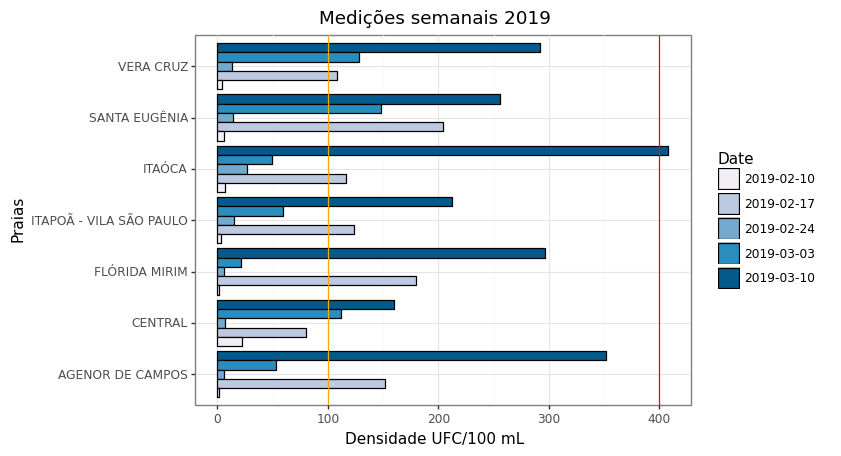

<ggplot: (8769585469963)>

In [19]:
(ggplot(monga_19, aes(x = "Beach",
                      y = "Enterococcus",
                      fill = "Date")) +
 geom_col(position = "dodge",
          color = "black") +
 labs(x = "Praias",
      y = "Densidade UFC/100 mL",
      title = "Medições semanais 2019") +
 theme_bw() +
 scale_fill_brewer(palette = "PuBu",
                   direction = 1) +
coord_flip() +
geom_hline(yintercept=100, color="orange") +
geom_hline(yintercept=400, color="red")
 )


- Em 2019, todas as praias apresentaram números acima de 100 UFC/100 mL em duas ou mais medições no período de cinco semanas.
- A praia de Itaóca apresentou uma medição acima de 400 UFC/100 mL.

Sendo assim, todas as praias de Mongaguá foram consideradas IMPRÓPRIAS para banho no Carnaval de 2019.

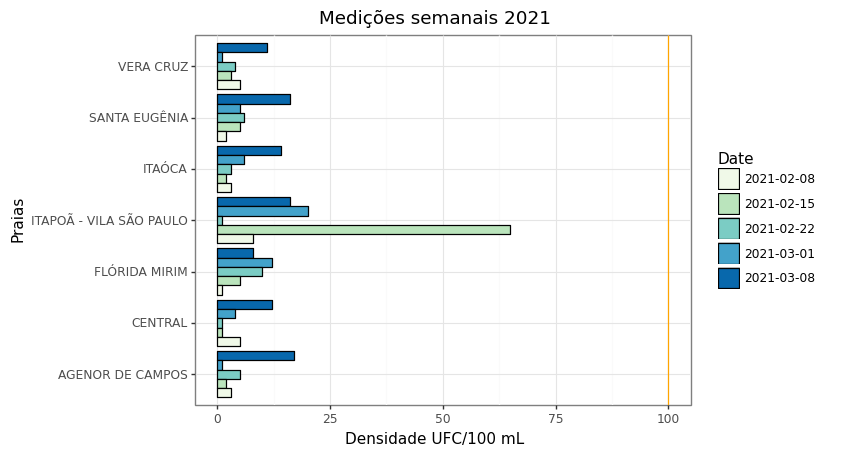

<ggplot: (8769587661527)>

In [15]:
(ggplot(monga_21, aes(x = "Beach",
                      y = "Enterococcus",
                      fill = "Date")) +
 geom_col(position = "dodge",
          color = "black") +
 labs(x = "Praias",
      y = "Densidade UFC/100 mL",
      title = "Medições semanais 2021") +
 theme_bw() +
 scale_fill_brewer(palette = "GnBu",
                   direction = 1) +
geom_hline(yintercept=100, color="orange") +
coord_flip()
 )



Em comparação:
- Em 2021, nenhuma praia apresentou números acima de 100 UFC/100 mL, em nenhum momento no período de cinco semanas.

Sendo assim, todas as praias de Mongaguá foram consideradas PRÓPRIAS para banho no Carnaval de 2021.

### Discussão

---

O aumento na densidade de bactérias pode tanto se dar pelo aumento da população usando os sistemas de saneamento básico quanto pelo contato direto de pessoas dentro da água, que muitas vezes fazem as necessidades ali mesmo.

Com a diminuição do turismo pelas restrições sanitárias, as praias de Mongaguá atingem um número adequado para contato primário. Temporadas turísticas, como o Carnaval, atraem muitas pessoas interessadas em aproveitar a praia e tomar banho de mar, porém também eleva os números de Enterococcus, deixando todas as praias impróprias para banho. Logo, não há como haver turismo sem elevação da densidade de Enterococcus, já que se ninguém entrasse numa água imprópria, os valores não subiriam. 

Apesar de serem colocados avisos sobre as condições da água em cada local, a maioria dos banhistas escolhe ignorar os avisos e entra no mar mesmo assim, se expondo às bactérias e colocando em risco sua própria saúde. Se todos os banhistas obedecessem os avisos, as águas não se tornariam impróprias, porém ninguém iria aproveitar a praia para não alterar a situação. 



Se existirem recursos suficientes para que medidas de intervenção sejam adotadas, uma possível solução para o problema seria delimitar horários para tomar banho de mar, utilizando faixas ou policiamento para impedir a entrada fora do horário. Outra ideia seria implementar duchas nas ruas, como várias cidades litorâneas possuem, para enxaguar o corpo antes de entrar na água.